In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

Matplotlib is building the font cache; this may take a moment.


In [5]:
df = pd.read_csv('../data/Customer-Churn-Records.csv')

In [8]:
df.head() #dataset's first 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [9]:
#dataset information
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

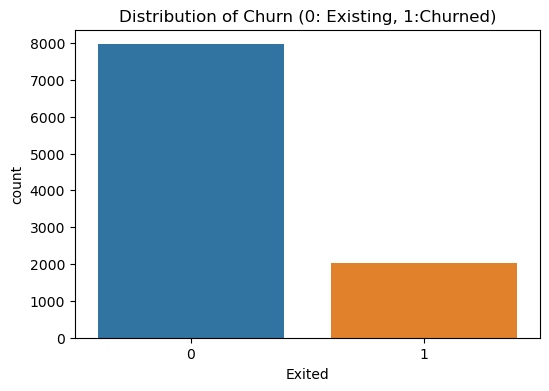

Exited
0    79.62
1    20.38
Name: proportion, dtype: float64


In [10]:
#target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Churn (0: Existing, 1:Churned)')
plt.show()

print(df['Exited'].value_counts(normalize=True) * 100) #percentage distribution of target variable

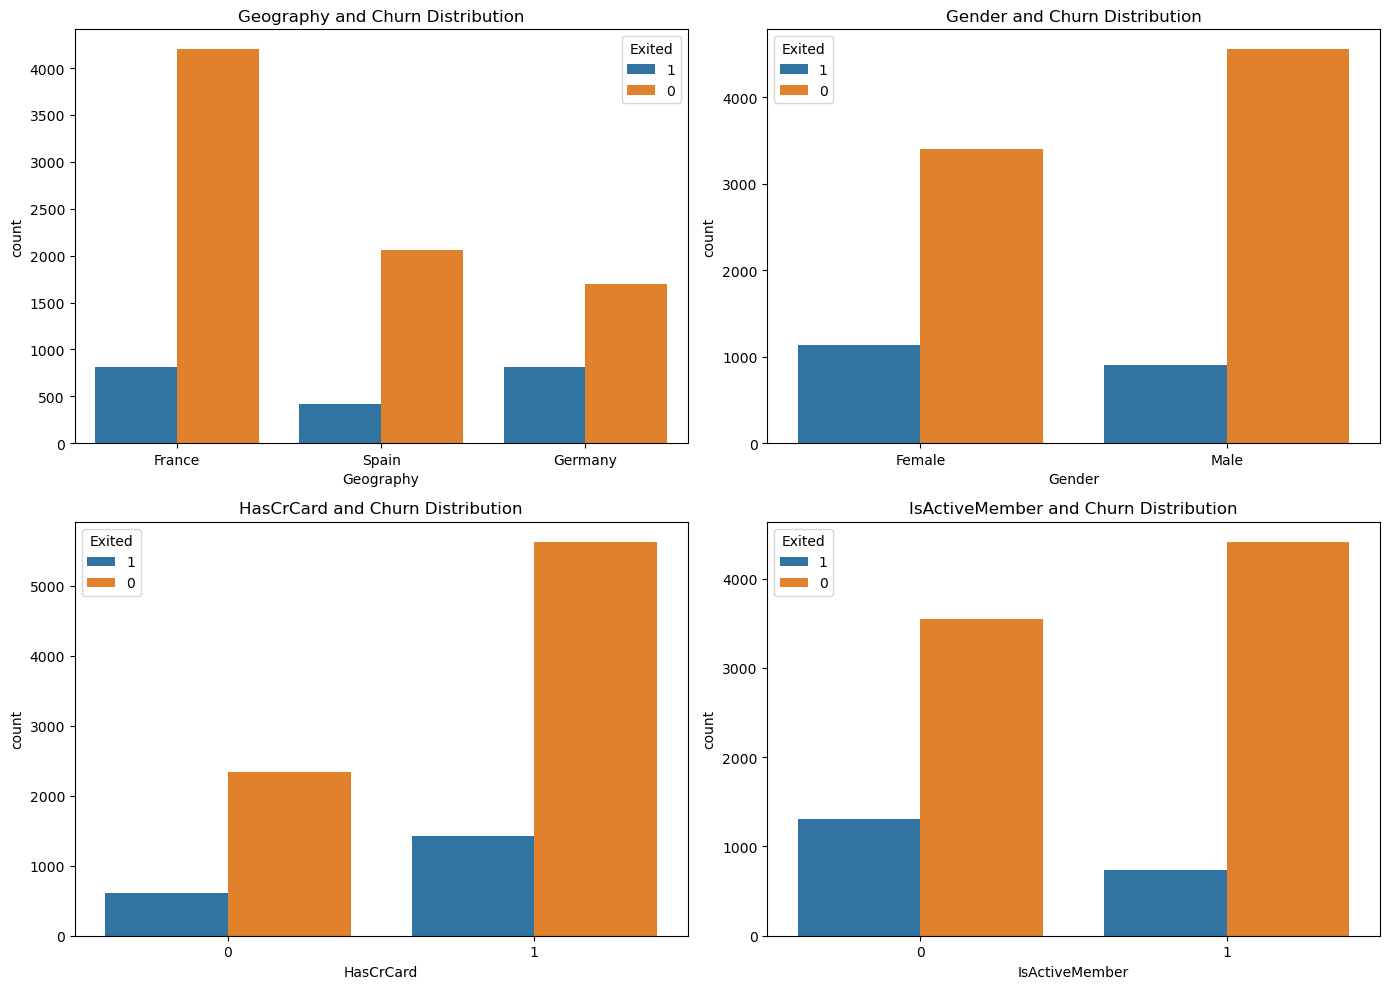

In [17]:
#let's see how categorical features affect churn
df_temp = df.copy()
df_temp['Exited'] = df_temp['Exited'].astype(str)

categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(categorical_cols):
    # data olarak df yerine df_temp kullanıyoruz
    sns.countplot(x=col, hue='Exited', data=df_temp, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{col} and Churn Distribution')

plt.tight_layout()
plt.show()

### Geography vs Churn
**France**: This country has the biggest customer number. Churn level is medium.  
**Spain**: Customer number and churn rate is low.
**Germany**: Remarkably, churn rate is high.

*So we can say that the churn rate is highest in Germany.*

### Gender vs Churn
Number of female customers is lower than male customers but churn rate is high in female customers.
Churn rate is remarkably high in female customers.

*Gender can be a meaningful feature for churn.*

### HasCrCard vs Churn
Both has close churn rate.

*Having a credit card is not important.*

### IsActiveMember vs Churn
Customers who are not active are likely to churn.

*We can say that one of the most critical feature is being an active member.*

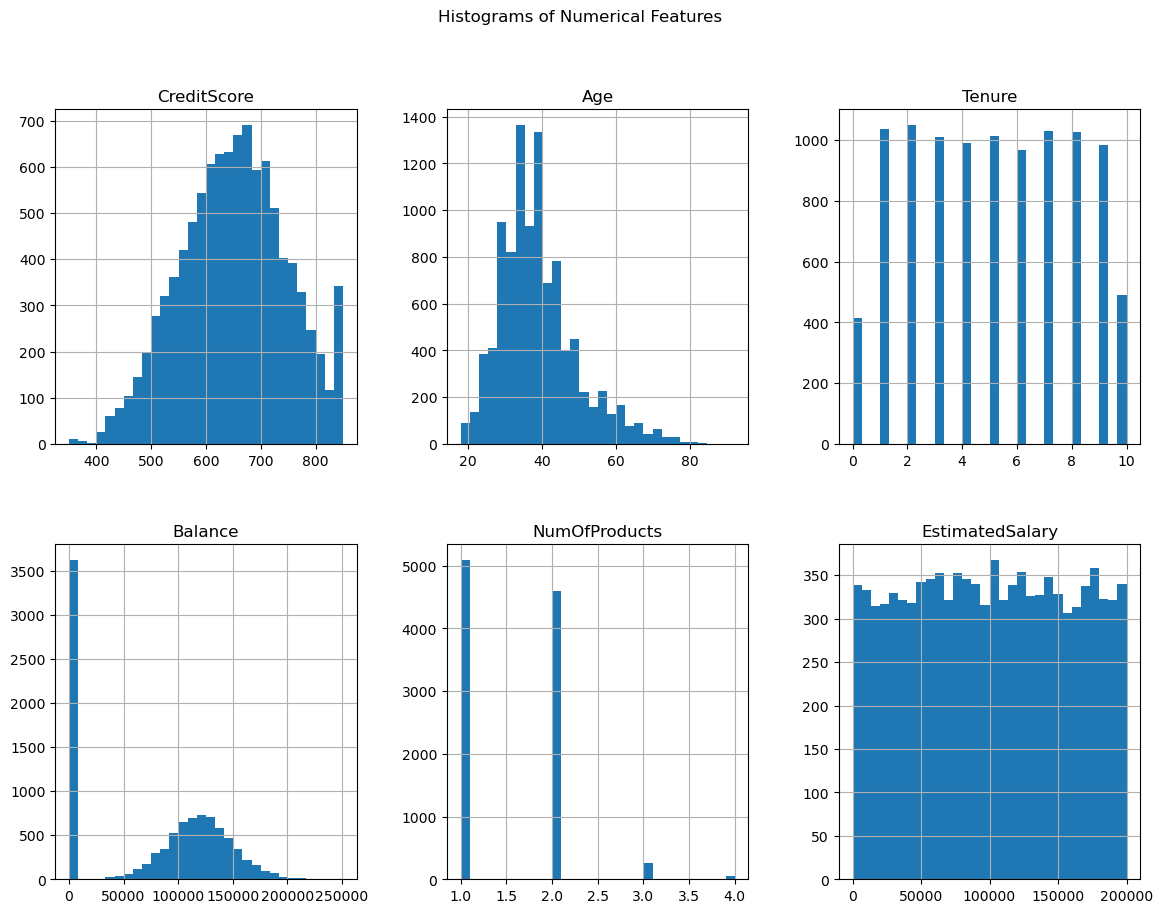

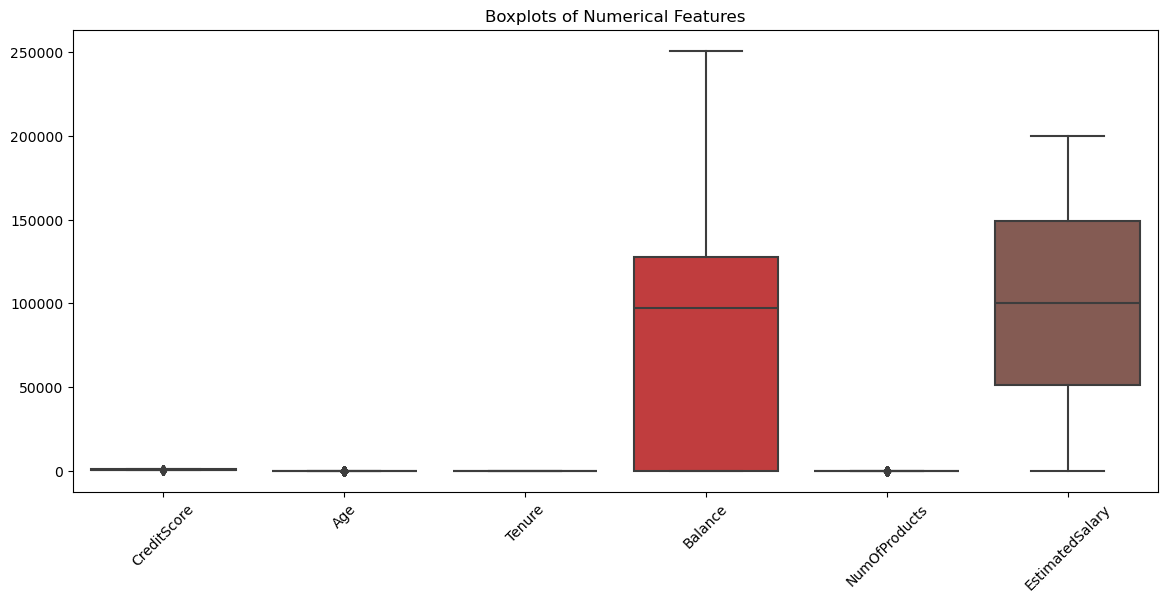

In [19]:
#analysis of numerical features

numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

#histograms
df[numeric_cols].hist(bins=30, figsize=(14,10), layout=(2,3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

#boxplots to see outliers
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

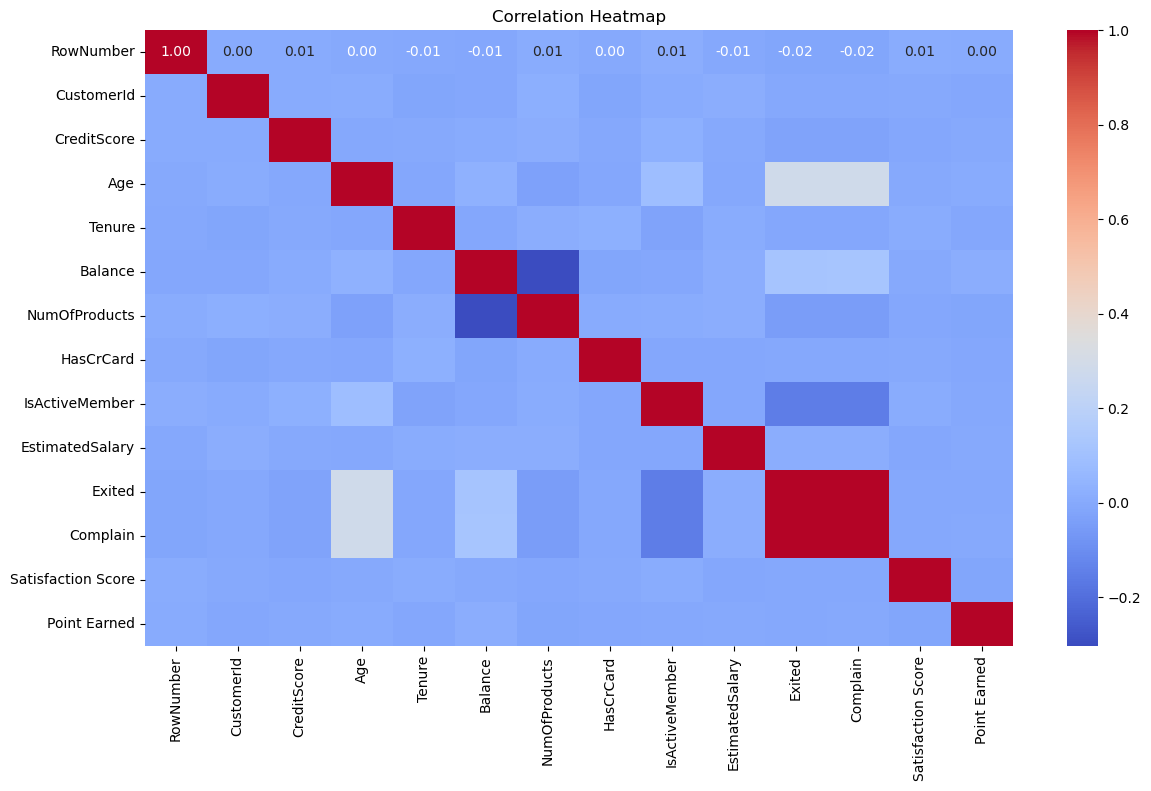

In [36]:
#correlation heatmap
plt.figure(figsize=(14,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## EDA Documentation
**Data Structure**: Dataset has 10.000 rows. No empty information.  
**Target**: Dataset is not balanced. There's 20% churn rate.  
**Relationships**: Age, balance and credit score are significant. Estimated Salary and Tenure are weak. Distribution of 0's in balance might be important.  
**Decisions**: RowNumber, CustomerId and Surname will be removed since they are not significant for the model.